In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as smd
import statsmodels.stats.outliers_influence as oi
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
%matplotlib inline


## Ejemplo 9.1 Modelo económico de la delincuencia (crime.dta)

In [3]:
dfej9_1 = pd.read_stata('crime1.dta')
dfej9_1.head()

,narr86,nfarr86,nparr86,pcnv,avgsen,tottime,ptime86,qemp86,inc86,durat,black,hispan,born60,pcnvsq,pt86sq,inc86sq
0,0,0,0,0.38,17.600000,35.200001,12,0.0,0.0,0.0,0,0,1,0.1444,144,0.000000
1,2,2,0,0.44,0.000000,0.000000,0,1.0,0.8,0.0,0,1,0,0.1936,0,0.640000
2,1,1,0,0.33,22.799999,22.799999,0,0.0,0.0,11.0,1,0,1,0.1089,0,0.000000
3,2,2,1,0.25,0.000000,0.000000,5,2.0,8.8,0.0,0,1,1,0.0625,25,77.440002
4,1,1,0,0.00,0.000000,0.000000,0,2.0,8.1,1.0,0,0,0,0.0000,0,65.610008


In [4]:
regdfej9_1 = smf.ols('narr86 ~  pcnv + avgsen + tottime + ptime86 + qemp86 + inc86 + black + hispan ', data = dfej9_1).fit()
print(regdfej9_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     26.47
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           8.69e-40
Time:                        14:36:46   Log-Likelihood:                -3349.9
No. Observations:                2725   AIC:                             6718.
Df Residuals:                    2716   BIC:                             6771.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5687      0.036     15.777      0.0

In [9]:
regdfej9_1a = smf.ols('narr86 ~ pcnv+pcnvsq+avgsen+tottime+ptime86+pt86sq+qemp86+inc86+inc86sq + black + hispan ', data = dfej9_1).fit()
print(regdfej9_1a.summary())

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     28.46
Date:                Sat, 25 Sep 2021   Prob (F-statistic):           4.21e-57
Time:                        16:43:18   Log-Likelihood:                -3303.4
No. Observations:                2725   AIC:                             6631.
Df Residuals:                    2713   BIC:                             6702.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5046      0.037     13.699      0.0

In [11]:
print(summary_col([regdfej9_1,regdfej9_1a]))


          narr86 I narr86 II
----------------------------
Intercept 0.5687   0.5046   
          (0.0360) (0.0368) 
avgsen    -0.0113  -0.0170  
          (0.0122) (0.0121) 
black     0.3265   0.2923   
          (0.0454) (0.0448) 
hispan    0.1939   0.1636   
          (0.0397) (0.0395) 
inc86     -0.0015  -0.0034  
          (0.0003) (0.0008) 
inc86sq            0.0000   
                   (0.0000) 
pcnv      -0.1332  0.5525   
          (0.0404) (0.1542) 
pcnvsq             -0.7302  
                   (0.1561) 
pt86sq             -0.0296  
                   (0.0039) 
ptime86   -0.0408  0.2874   
          (0.0088) (0.0443) 
qemp86    -0.0505  -0.0141  
          (0.0144) (0.0174) 
tottime   0.0120   0.0120   
          (0.0094) (0.0093) 
Standard errors in
parentheses.


Los cuadrados de las variables $pcnv$, $ptime86$ e $inc86$, se incluyen porque en el modelo original cada uno de los términos lineales es significativo

La variable $qemp86$ es una variable discreta , de manera que en no se en el nuevo modelo incluye su cuadrado.

Nota : Si hacemos la regresión y el test con np.power(var, 2) el F es distinto, pero el resultado en términos de decisión es el mismo

In [13]:
hypotheses = '(pcnvsq = 0),(pt86sq=0), (inc86sq=0)'
f_test = regdfej9_1a.f_test(hypotheses)    
print (f_test)

<F test: F=array([[31.40381314]]), p=5.965855699821252e-20, df_denom=2713, df_num=3>


Se rechaza la Ho pues el p value es muy pequeño 5,9e-20. Entonces el modelo inicial pasó por alto algunas no linealidades
potencialmente importantes.

La presencia de los términos cuadráticos dificulta un poco la interpretación del modelo

El problema de la forma funcional puede deberse a la naturaleza de la variable dependiente. Otros modelos son teóricamente más adecuados para manejar variables dependientes que toman una cantidad reducida de valores enteros

In [14]:
dfej9_1.narr86.unique()

array([ 0,  2,  1,  5,  3,  4, 12,  9,  6, 10,  7], dtype=int8)

## Ejemplo 9.2  La ecuación del precio de la vivienda (hprice1.dta)

In [2]:
dfej9_2 = pd.read_stata('hprice1.dta')
dfej9_2.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [3]:
regdfej9_2 = smf.ols('price ~  lotsize + sqrft + bdrms ', data = dfej9_2).fit()
print(regdfej9_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           2.70e-20
Time:                        18:14:52   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.4

In [ ]:
# Nota : Ya no existe el comando linear_reset de la librería  statsmodels.stats.diagnostic

In [ ]:
En degree van la cantidad de independientes de la regresión original

In [10]:
resettest = oi.reset_ramsey (regdfej9_2, degree = 3)

In [11]:
print(resettest)

<F test: F=array([[4.66820553]]), p=0.012021711442873445, df_denom=82, df_num=2>


In [12]:
regdfej9_2a = smf.ols('lprice ~  llotsize + lsqrft + bdrms ', data = dfej9_2).fit()
print(regdfej9_2a.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           9.74e-19
Time:                        19:43:53   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.651     -1.992      0.0

In [14]:
resettesta = oi.reset_ramsey (regdfej9_2a, degree = 3)

In [15]:
print(resettesta)

<F test: F=array([[2.5650462]]), p=0.0830754662433421, df_denom=82, df_num=2>


Se prueban dos modelos, uno en nivel, y el otro en logaritmos, y con las explicativas también en logaritmos salvo una, $bdrms$

El RESET del primer modelo tiene un p value de 0.012 , pareciendo que hay evidencia de especificación incorrecta de la forma funcional
El RESET del segundo modelo, con un p value de 0.08 , no rechaza la Ho (que supone que el polinomo de valores ajustados no es significativo) por lo que no se rechaza el modelo con logaritmos (al 5%, pero si al 10%)

## Ejemplo 9.3 QI como proxi de la habilidad (wage2.dta)

In [2]:
dfej9_3 = pd.read_stata('wage2.dta')
dfej9_3.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


In [7]:
dfej9_3.dtypes

wage         int16
hours         int8
IQ           int16
KWW           int8
educ          int8
exper         int8
tenure        int8
age           int8
married       int8
black         int8
south         int8
urban         int8
sibs          int8
brthord    float64
meduc      float64
feduc      float64
lwage      float32
dtype: object

In [8]:
dfej9_3['wage'] = dfej9_3['wage'].astype(float)

In [9]:
dfej9_3['educ'] = dfej9_3['educ'].astype(float)

In [10]:
dfej9_3['tenure'] = dfej9_3['tenure'].astype(float)

In [11]:
dfej9_3['married'] = dfej9_3['married'].astype(float)

In [12]:
dfej9_3['south'] = dfej9_3['south'].astype(float)

In [13]:
dfej9_3['urban'] = dfej9_3['urban'].astype(float)

In [14]:
dfej9_3['black'] = dfej9_3['black'].astype(float)

In [15]:
dfej9_3['IQ'] = dfej9_3['IQ'].astype(float)

In [18]:
dfej9_3['exper'] = dfej9_3['exper'].astype(float)

In [16]:
edIQ = dfej9_3['educ']*dfej9_3['IQ']

In [19]:
regdfej9_3 = smf.ols('np.log(wage) ~  educ + exper + tenure + married + south + urban + black + IQ + edIQ  ', data = dfej9_3).fit()
print(regdfej9_3.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     36.76
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           6.85e-56
Time:                        15:53:57   Log-Likelihood:                -374.69
No. Observations:                 935   AIC:                             769.4
Df Residuals:                     925   BIC:                             817.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6482      0.546     10.339      0.0

## Ejemplo 9.4 Índices de delincuancia urbana (crime2.dta)

In [45]:
dfej9_4 = pd.read_stata('crime2.dta')
dfej9_4.head()

,pop,crimes,unem,officers,pcinc,west,nrtheast,south,year,area,...,clcrimes,clpop,clcrmrte,lpolpc,clpolpc,cllawexp,cunem,clpopden,lcrmrt_1,ccrmrte
0,229528.0,17136.0,8.2,326,8532,1,0,0,82,44.599998,...,NaN,NaN,NaN,0.350872,NaN,NaN,NaN,NaN,NaN,NaN
1,246815.0,17306.0,3.7,321,12155,1,0,0,87,44.599998,...,0.009871,0.072614,-0.062743,0.262802,-0.08807,0.977952,-4.5,0.072615,4.312912,-4.540268
2,814054.0,75654.0,8.1,1621,7551,1,0,0,82,375.000000,...,NaN,NaN,NaN,0.688772,NaN,NaN,NaN,NaN,NaN,NaN
3,933177.0,83960.0,5.4,1803,11363,1,0,0,87,375.000000,...,0.104170,0.136568,-0.032398,0.658612,-0.03016,0.200762,-2.7,0.136568,4.531899,-2.962654
4,374974.0,31352.0,9.0,633,8343,1,0,0,82,49.799999,...,NaN,NaN,NaN,0.523614,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Se filtra la base para el año 1987 y se resetea el índice por quue lo exige la regresión
# si hicieramos len() se vería que esta base y la serie que se crea luego tienen la misma dimensión (46), de otra manera 
# no podría hacere la regrsión
dfej9_487= dfej9_4[dfej9_4.year == 87].reset_index()

In [69]:
# De la base filtrada para año 82 selecciono crmrte y lo escribo como la serie, pues no hace falta imcorporar a la base para
# hacer la regresión (podría haberlo hecho) y se pone reset_index, por que lo exige la regresión, y se pone drop para 
# que no sea dataframe y se coloque el índice viejo como serie. 
crmrte82 = dfej9_4[dfej9_4.year == 82].crmrte.reset_index(drop=True)

In [71]:
regdfej9_4 = smf.ols('np.log(crmrte) ~  unem + np.log(lawexpc) + np.log(crmrte82) ', data = dfej9_487).fit()
print(regdfej9_4.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(crmrte)   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     29.73
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.80e-10
Time:                        17:36:47   Log-Likelihood:                 13.087
No. Observations:                  46   AIC:                            -18.17
Df Residuals:                      42   BIC:                            -10.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0765      0.821  

## Ejemplo 9.5 Función de ahorro con error de medida 

## Ejemplo 9.6 Error de medida en la tasa de desecho 

## Ejemplo 9.7 Ecuación de la calficaclón media en la universidad con error de medida

## Ejemplo 9.8 Tamaño de la empresa e inversión en I+D (rdchem.dta)

In [2]:
dfej9_8 = pd.read_stata('rdchem.dta')
dfej9_8.head()

,rd,sales,profits,rdintens,profmarg,salessq,lsales,lrd
0,430.600006,4570.200195,186.899994,9.421906,4.089536,2.088673e+07,8.427312,6.065180
1,59.000000,2830.000000,467.000000,2.084806,16.501766,8.008900e+06,7.948032,4.077538
2,23.500000,596.799988,107.400002,3.937668,17.995979,3.561702e+05,6.391582,3.157000
3,3.500000,133.600006,-4.300000,2.619760,-3.218563,1.784896e+04,4.894850,1.252763
4,1.700000,42.000000,8.000000,4.047619,19.047619,1.764000e+03,3.737670,0.530628


In [3]:
regdfej9_8 = smf.ols('rdintens ~  sales + profmarg ', data = dfej9_8).fit()
print(regdfej9_8.summary())

                            OLS Regression Results                            
Dep. Variable:               rdintens   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.195
Date:                Sun, 26 Sep 2021   Prob (F-statistic):              0.317
Time:                        11:03:38   Log-Likelihood:                -63.725
No. Observations:                  32   AIC:                             133.4
Df Residuals:                      29   BIC:                             137.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6253      0.586      4.484      0.0

Ni $sales$ ni $profmarg$ son significativos

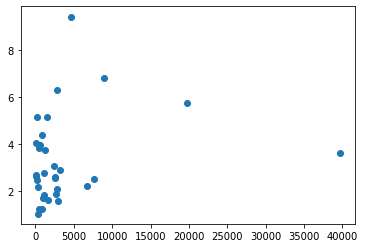

In [4]:
plt.scatter(dfej9_8.sales, dfej9_8.rdintens)

De las 32 empresas, 31 tienen ventas anuales menores a 20 mil millones

Estimamos el modelo eliminando ese outlier

In [5]:
regdfej9_8a = smf.ols('rdintens ~  sales + profmarg ', data = dfej9_8[(dfej9_8['sales']<30000)]).fit()
print(regdfej9_8a.summary())

                            OLS Regression Results                            
Dep. Variable:               rdintens   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.925
Date:                Sun, 26 Sep 2021   Prob (F-statistic):             0.0702
Time:                        11:19:09   Log-Likelihood:                -60.496
No. Observations:                  31   AIC:                             127.0
Df Residuals:                      28   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2969      0.592      3.881      0.0

Ahora $sales$ es significativas, al 5%, pero $profmarg$ sigue sin serlo
El coeficiente de $sales$ aumentó mucho 

In [10]:
print(summary_col([regdfej9_8,regdfej9_8a], stars=True))


          rdintens I rdintens II
--------------------------------
Intercept 2.6253***  2.2969***  
          (0.5855)   (0.5918)   
sales     0.0001     0.0002**   
          (0.0000)   (0.0001)   
profmarg  0.0446     0.0478     
          (0.0462)   (0.0445)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Ejemplo 9.9 lntensldad de inversión en I+D * (rdchem.dta)

In [77]:
regdfej9_9 = smf.ols('np.log(rd) ~  np.log(sales) + profmarg ', data = dfej9_8).fit()
print(regdfej9_9.summary())

                            OLS Regression Results                            
Dep. Variable:             np.log(rd)   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.79e-16
Time:                        18:15:48   Log-Likelihood:                -22.511
No. Observations:                  32   AIC:                             51.02
Df Residuals:                      29   BIC:                             55.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.3783      0.468     -9.355

## Ejemplo 9.10 Índice estatal de mortalidad infantil (infmrt.dta)

In [78]:
dfej9_10 = pd.read_stata('infmrt.dta')
dfej9_10.head()

,year,infmort,afdcprt,popul,pcinc,physic,afdcper,d90,lpcinc,lphysic,DC,lpopul
0,1987,8.3,52,1186,13996,173,4.384486,0,9.546527,5.153292,0,7.078341
1,1990,6.2,62,1228,17125,178,5.048860,1,9.748295,5.181784,0,7.113142
2,1987,7.8,11,1056,18083,186,1.041667,0,9.802728,5.225747,0,6.962244
3,1990,7.1,21,1109,21051,200,1.893598,1,9.954703,5.298317,0,7.011214
4,1987,8.5,20,547,14267,244,3.656307,0,9.565704,5.497168,0,6.304449


In [80]:
# Filtra base en year = 1990
dfej9_1090= dfej9_10[dfej9_10.year == 1990]

In [81]:
regdfej9_10 = smf.ols('infmort ~  np.log(pcinc) + np.log(physic) +np.log(popul) ', data = dfej9_1090).fit()
print(regdfej9_10.summary())

                            OLS Regression Results                            
Dep. Variable:                infmort   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.531
Date:                Wed, 15 Jul 2020   Prob (F-statistic):             0.0684
Time:                        18:38:02   Log-Likelihood:                -107.09
No. Observations:                  51   AIC:                             222.2
Df Residuals:                      47   BIC:                             229.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         33.8593     20.428      1.